In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix
from skopt import BayesSearchCV

In [123]:
exclude_labels = [0] # colocar aqui as labels que quiser descartar
train = pd.read_parquet('./data/TRAIN_person3_car2_dog3_cow2_noise3.parquet').sample(frac=1)
train = train[~train['label'].isin(exclude_labels)]
train_matrices = train.iloc[:, 1:].values.reshape(-1, 500, 52).transpose(0, 2, 1).astype(np.float8)
scale_factor = train_matrices.mean()

test = pd.read_parquet('./data/TEST_person3_car2_dog3_cow2_noise3.parquet').sample(frac=1)
test = test[~test['label'].isin(exclude_labels)]
test_matrices = test.iloc[:, 1:].values.reshape(-1, 500, 52).transpose(0, 2, 1).astype(np.float8)

train_carrier_means = train_matrices.mean(axis=2)
train_carrier_stds = train_matrices.std(axis=2)

test_carrier_means = test_matrices.mean(axis=2)
test_carrier_stds = test_matrices.std(axis=2)

train_features = np.concatenate([train_carrier_means, train_carrier_stds], axis=1)
test_features = np.concatenate([test_carrier_means, test_carrier_stds], axis=1)

AttributeError: module 'numpy' has no attribute 'float8'

[0.9435215946843853, 0.9401993355481728, 0.9335548172757475, 0.9269102990033222, 0.9302325581395349, 0.9302325581395349, 0.9269102990033222, 0.9235880398671097, 0.9235880398671097, 0.9235880398671097, 0.9235880398671097, 0.9169435215946844, 0.9169435215946844, 0.9169435215946844, 0.920265780730897, 0.9169435215946844, 0.9169435215946844, 0.9136212624584718, 0.9069767441860465, 0.9069767441860465, 0.9036544850498339, 0.9069767441860465, 0.9069767441860465, 0.9069767441860465, 0.9102990033222591, 0.9568106312292359, 0.9269102990033222, 0.9435215946843853, 0.9435215946843853, 0.946843853820598, 0.9501661129568106, 0.9501661129568106, 0.9534883720930233, 0.9568106312292359, 0.9568106312292359, 0.9568106312292359, 0.9534883720930233, 0.9501661129568106, 0.9534883720930233, 0.9601328903654485, 0.9568106312292359, 0.9534883720930233, 0.9435215946843853, 0.9435215946843853, 0.9335548172757475, 0.9335548172757475, 0.9335548172757475, 0.9368770764119602, 0.9335548172757475, 0.946843853820598]


ValueError: x and y must be the same size

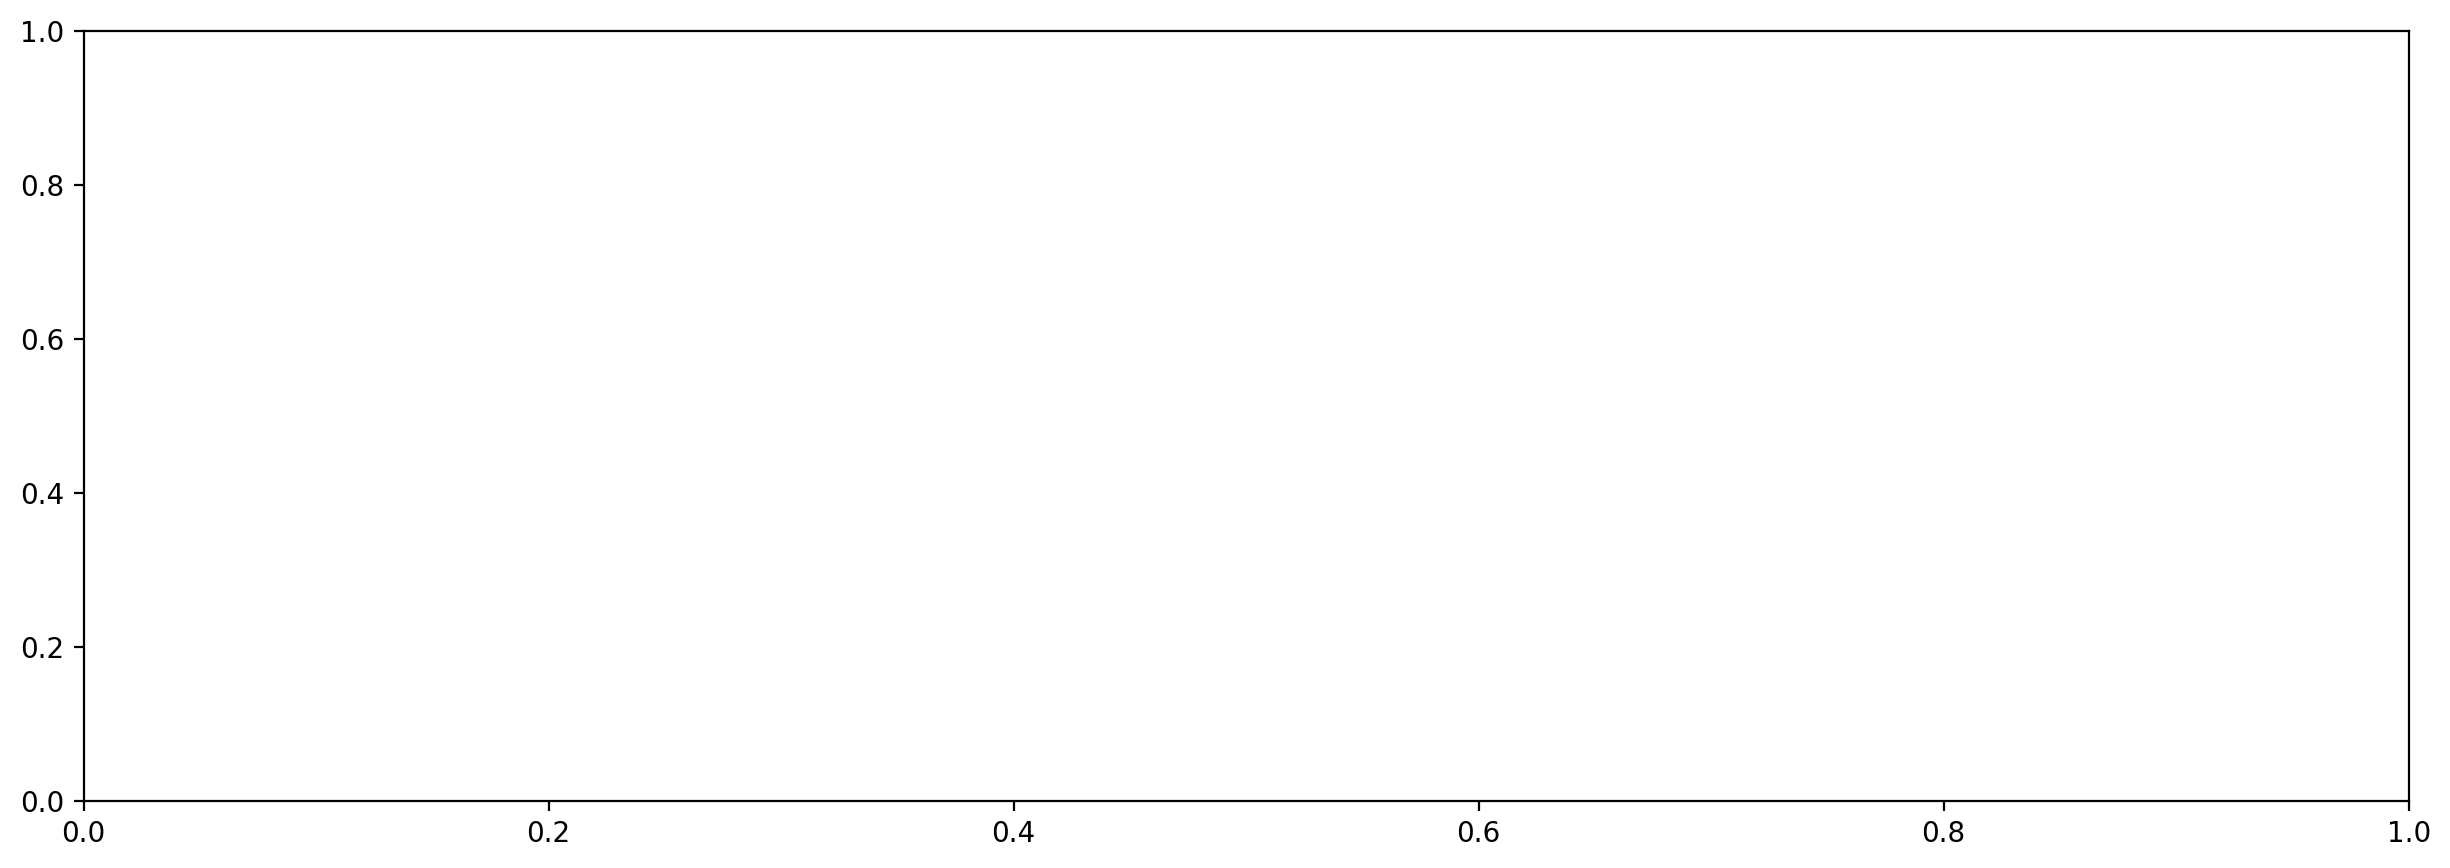

In [124]:

scores = []
ks = range(1, 50, 2)

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_features, train['label'])
    preds = model.predict(test_features)
    score = accuracy_score(test['label'], preds)
    scores.append(score)

fig, ax = plt.subplots(1, 1, figsize=(15, 5), dpi=200)
print(scores)
ax.scatter(ks, scores, s=80)
plt.xticks(ks)
plt.xlabel('K')
plt.ylabel('Acurácia (0 a 1)')
plt.title('Performance do KNN - Features em float32')
plt.grid()
plt.show()



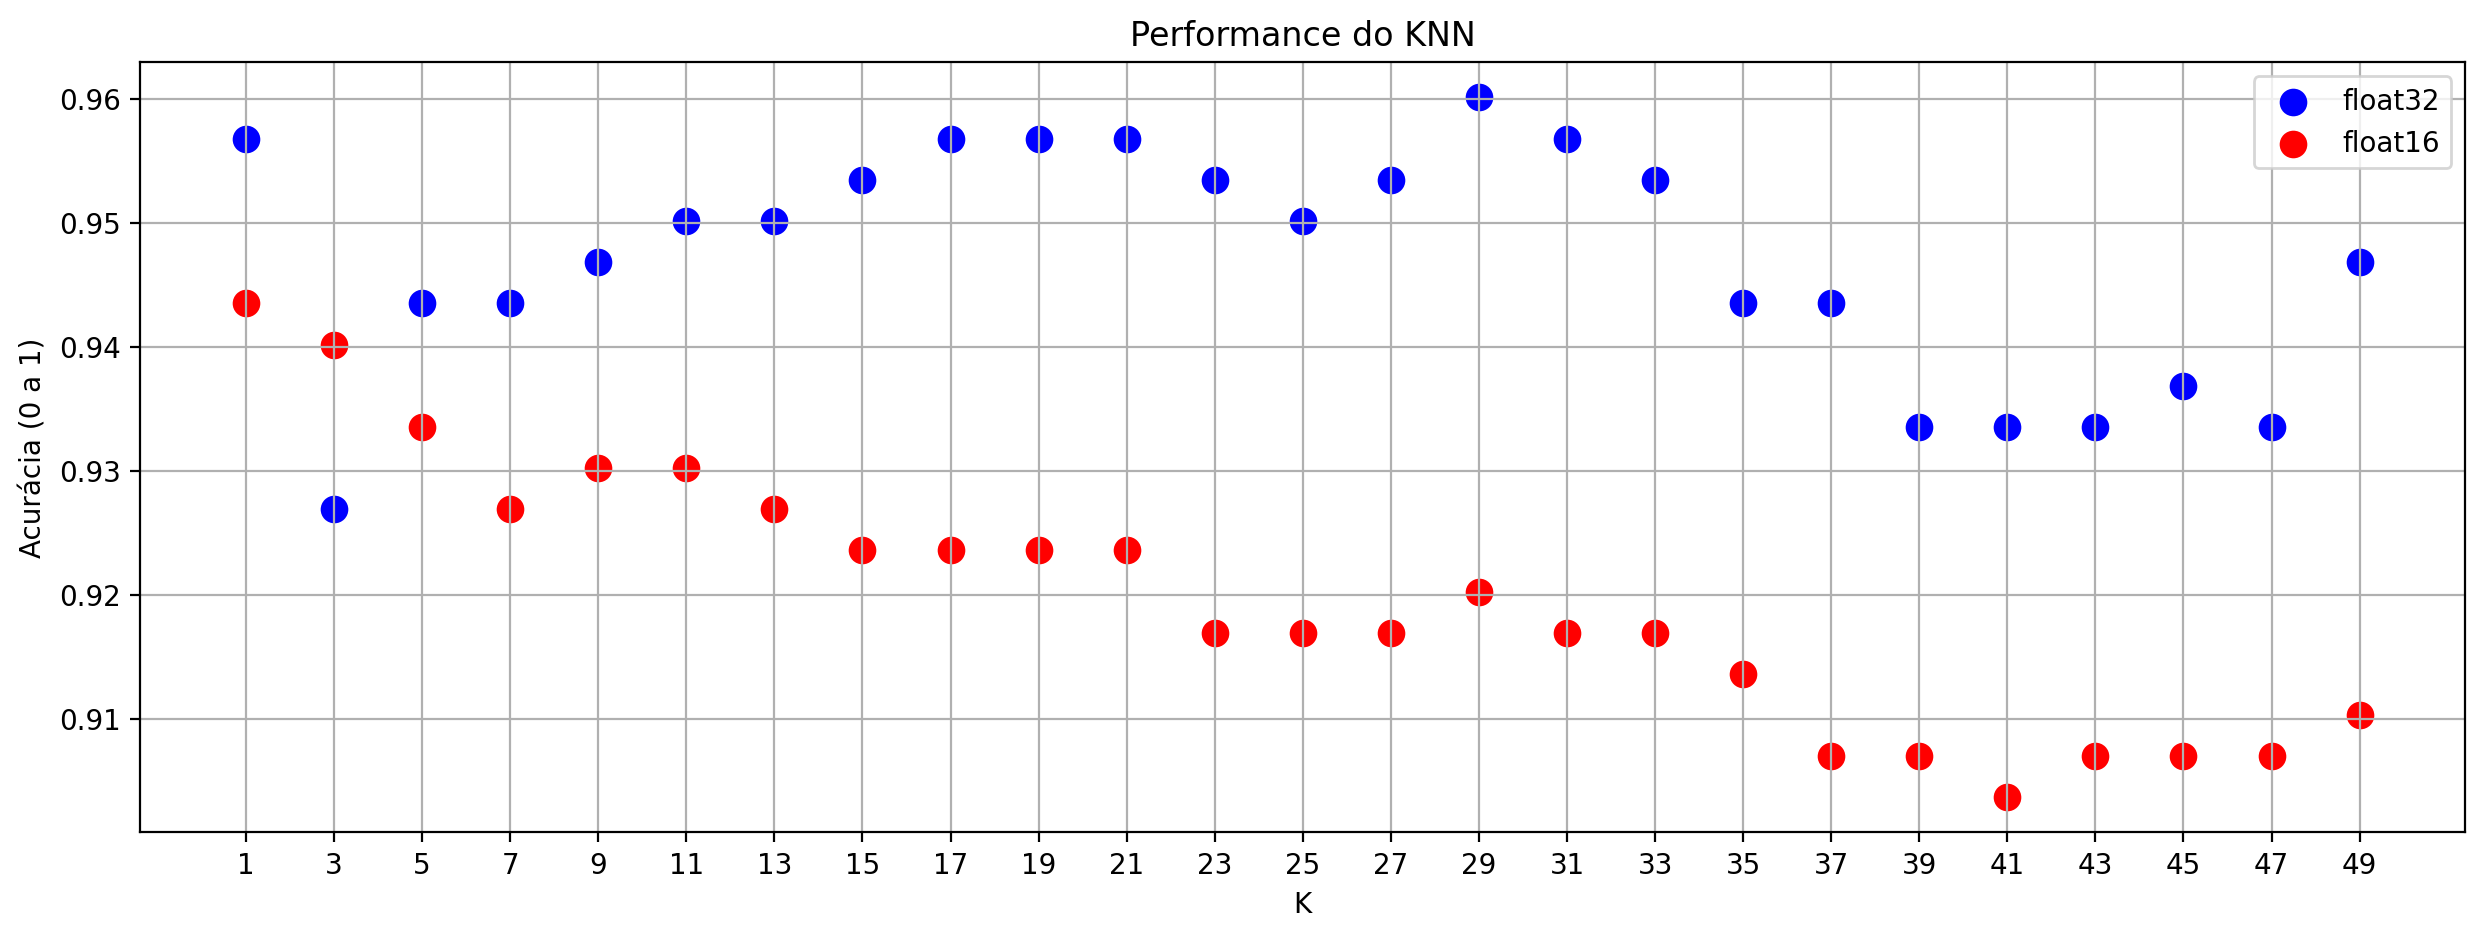

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5), dpi=200)

ax.scatter(ks, scores_32, s=80, label='float32', color='blue')
ax.scatter(ks, scores_16, s=80, label='float16', color='red')

plt.xticks(ks)
plt.xlabel('K')
plt.ylabel('Acurácia (0 a 1)')
plt.title('Performance do KNN')
plt.grid()
plt.legend()
plt.show()



In [96]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(train_features, train['label'])
preds = model.predict(test_features)
score = accuracy_score(test['label'], preds)
score

0.9302325581395349

In [60]:
model = RandomForestClassifier(n_estimators=50)
model.fit(train_features, train['label'])
preds = model.predict(test_features)
print(accuracy_score(test['label'], preds))

0.8471760797342193


In [41]:
model = LogisticRegression()
model.fit(train_features, train['label'])
preds = model.predict(test_features)
print(accuracy_score(test['label'], preds))

0.840531561461794


/home/paulo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
model = SVC(kernel='linear', C=4, )
model.fit(train_features, train['label'])
preds = model.predict(test_features)
print(accuracy_score(test['label'], preds))

0.8970099667774086


In [43]:
model.coef_.shape

(6, 104)